# What type of songs should be produced?

The project is to conduct an analysis on the popular songs on Spotify platform to determine to help a music producer to determine what type of songs they should produce for new artists. 

The dataset is top 50 popular songs on Spotify from 2010 to 2019 with the following atrributes.

* `title` - Song's title.
* `artist` - Song's artist.
* `top genre` - The genre of the track.
* `year` - Song's year in the Billboard.
* `bpm` - Beats PerMinute - The tempo of the song.
* `nrgy` - Energy- The energy of a song - the higher the value, the more energtic the song.
* `dnce` - Danceability - The higher the value, the easier it is to dance to this song.
* `dB` - Loudness - The higher the value, the louder the song.
* `live` - Liveness - The higher the value, the more likely the song is a live recording.
* `val` - Valence - The higher the value, the more positive mood for the song.
* `dur` - Length - The duration of the song.
* `acous` - Acousticness - The higher the value the more acoustic the song is.
* `spch` - Speechiness - The higher the value the more spoken word the song contains.
* `pop` - Popularity- The higher the value the more popular the song is.


# Data Preprocessing

In [1]:
# load libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# load data

songs = pd.read_csv(r'D:\top10s.csv', sep=',', index_col=0, encoding='ISO-8859-1')

songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


In [3]:
# rename the column names

songs.rename(columns = {'top genre':'genre', 'nrgy':'energy', 'dnce':'danceability',
                        'val':'valence', 'dur':'duration', 'acous':'acousticness',
                        'spch':'speechiness', 'pop':'popularity'}, inplace = True)
songs.head()

,title,artist,genre,year,bpm,energy,danceability,dB,live,valence,duration,acousticness,speechiness,popularity
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
# check missing values

songs.isna().sum()

title           0
artist          0
genre           0
year            0
bpm             0
energy          0
danceability    0
dB              0
live            0
valence         0
duration        0
acousticness    0
speechiness     0
popularity      0
dtype: int64

In [5]:
# check duplicates

songs.duplicated().sum()

0

***
- *No missing values.*
- *No duplicates.*
***

 # Songs

In [6]:
# number of songs per year 
year_songs = songs.groupby('year').agg(no_of_songs=('title', 'nunique'), popularity=('popularity','median'))
year_songs


,no_of_songs,popularity
year,,
2010,51,65.0
2011,53,66.0
2012,35,72.0
2013,71,67.0
2014,58,65.0
2015,94,68.0
2016,80,69.0
2017,65,71.0
2018,64,74.5


# Popular Artists 

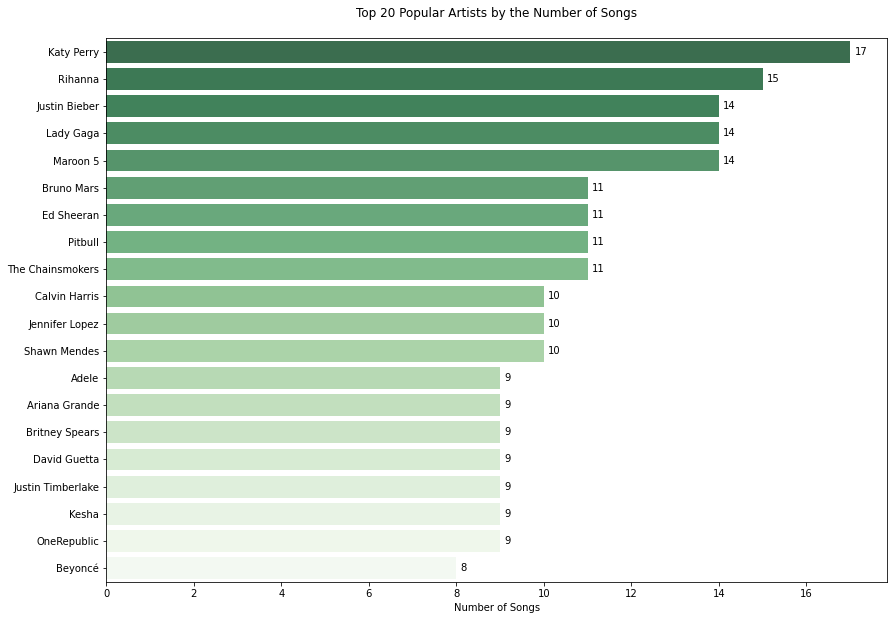

In [7]:
# top 20 artists by the number of songs

artist_songs = songs.groupby('artist').agg(no_of_songs=('title','nunique'))
top_artists = artist_songs.nlargest(20,'no_of_songs')


plt.figure(figsize=(14, 10))

ax = sns.barplot(x='no_of_songs', y=top_artists.index, data=top_artists, palette='Greens_r', alpha=0.8 )

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 0.1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width),  # set variable to display, 2 decimals
            ha = 'left',    # horizontal alignment
            va = 'center')  # vertical alignment

plt.xlabel('Number of Songs')
plt.ylabel('')
plt.title('Top 20 Popular Artists by the Number of Songs\n')

plt.show()


***
- *Most of top 20 artists are from USA.*
- *The rest are from Canada and UK.*
***

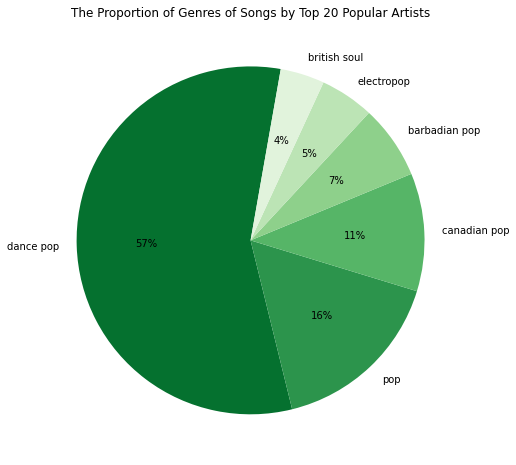

In [8]:
# genres of songs by top 20 artists

top_artist_genres = songs[songs['artist'].isin(top_artists.index)].groupby('genre').agg(no_of_songs=('title','nunique'))

plt.figure(figsize=(8, 8))

colors = sns.color_palette('Greens_r')[0:6]
data = top_artist_genres.sort_values(by='no_of_songs', ascending=False)

plt.pie(data=data, labels=data.index, x='no_of_songs', colors=colors, startangle=80, autopct='%.0f%%')
plt.title('The Proportion of Genres of Songs by Top 20 Popular Artists')
plt.show()

***
- *57% of songs from top 20 artists are dance pop.*
- *16% of songs from top 20 artists are pop.*
- *11% of songs from top 20 artists are canadian pop.*
***

# Genres

In [9]:
# Top 10 genres by the number of songs

genre_songs = songs.groupby('genre').agg(no_of_songs=('title','nunique'),
                                         no_of_artists=('artist', 'nunique'))
genre_songs['%_of_total'] = (genre_songs['no_of_songs']/songs['title'].nunique()*100).round(1)


In [10]:
top_genres = genre_songs.nlargest(20, 'no_of_songs')
top_genres

,no_of_songs,no_of_artists,%_of_total
genre,,,
dance pop,324,89,55.5
pop,56,13,9.6
canadian pop,31,4,5.3
barbadian pop,15,1,2.6
boy band,15,5,2.6
electropop,13,3,2.2
big room,10,7,1.7
british soul,10,2,1.7
neo mellow,9,4,1.5


In [11]:
print('The share is {0:.1f}%.'.format(top_genres['%_of_total'].sum()))

The share is 92.7%.


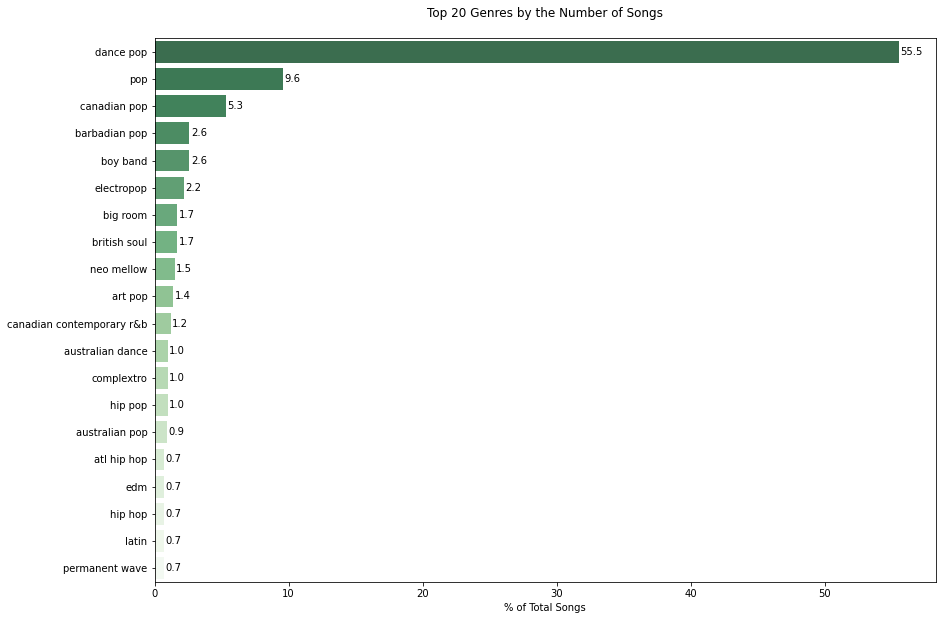

In [12]:
# bar plot 

plt.figure(figsize=(14, 10))

ax = sns.barplot(x='%_of_total', y=top_genres.index, data=top_genres, palette='Greens_r', alpha=0.8 )

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 0.1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width),  # set variable to display, 2 decimals
            ha = 'left',    # horizontal alignment
            va = 'center')  # vertical alignment

plt.xlabel('% of Total Songs')
plt.ylabel('')
plt.title('Top 20 Genres by the Number of Songs\n')

plt.show()

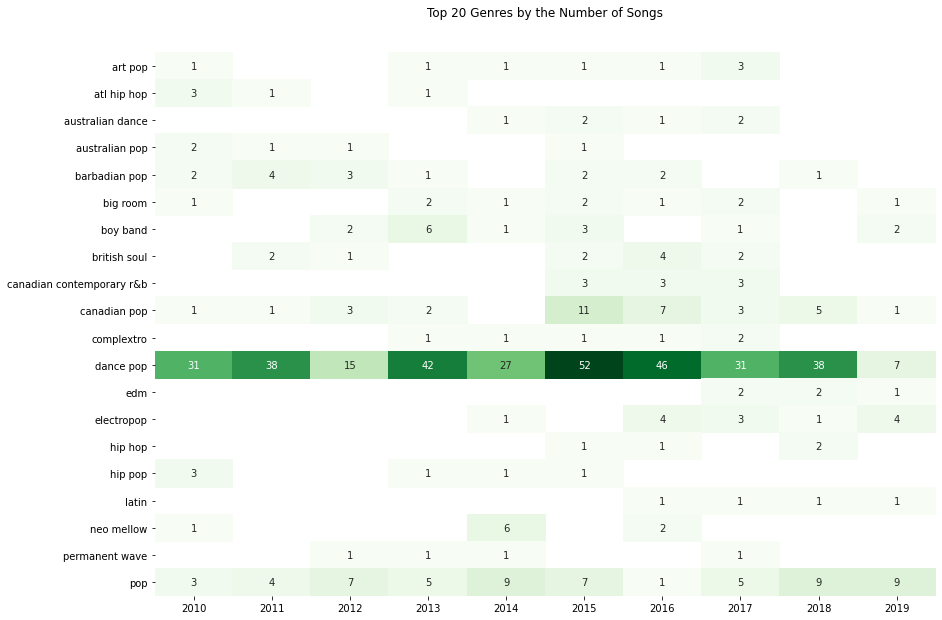

In [13]:
# heatmap for top 20 genres by the number songs

top_genre_songs = songs.query('genre in @top_genres.index')\
                        .groupby(['genre', 'year'])['title'].nunique().unstack()

plt.figure(figsize=(14, 10))
sns.heatmap(top_genre_songs, annot=True, cmap='Greens', cbar=False)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Top 20 Genres by the Number of Songs\n\n')
plt.xlabel('')
plt.ylabel('')

plt.show()

***
- *Dance pop genre has the greatest number of songs every year from 2010-2019.*
- *Around 55.5% of songs are dance pop, 9.6% are pop.*
***



In [14]:
# distribution of popularity
songs['popularity'].describe()


count    603.000000
mean      66.520730
std       14.517746
min        0.000000
25%       60.000000
50%       69.000000
75%       76.000000
max       99.000000
Name: popularity, dtype: float64

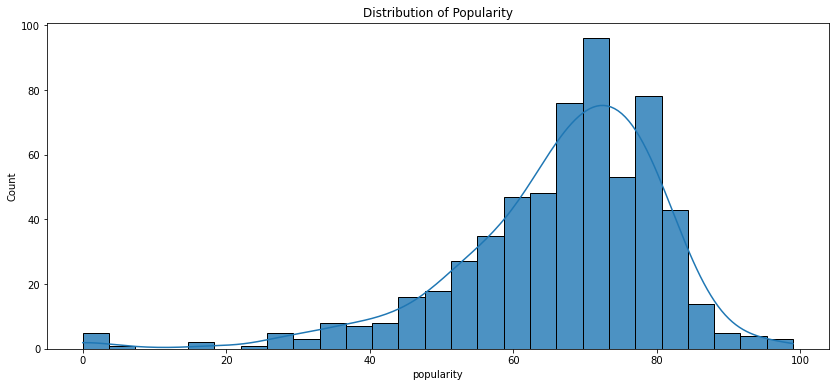

In [15]:
plt.figure(figsize = (14, 6))

sns.histplot(data=songs, x='popularity', kde=True, alpha=0.8)

plt.title('Distribution of Popularity')

plt.show()

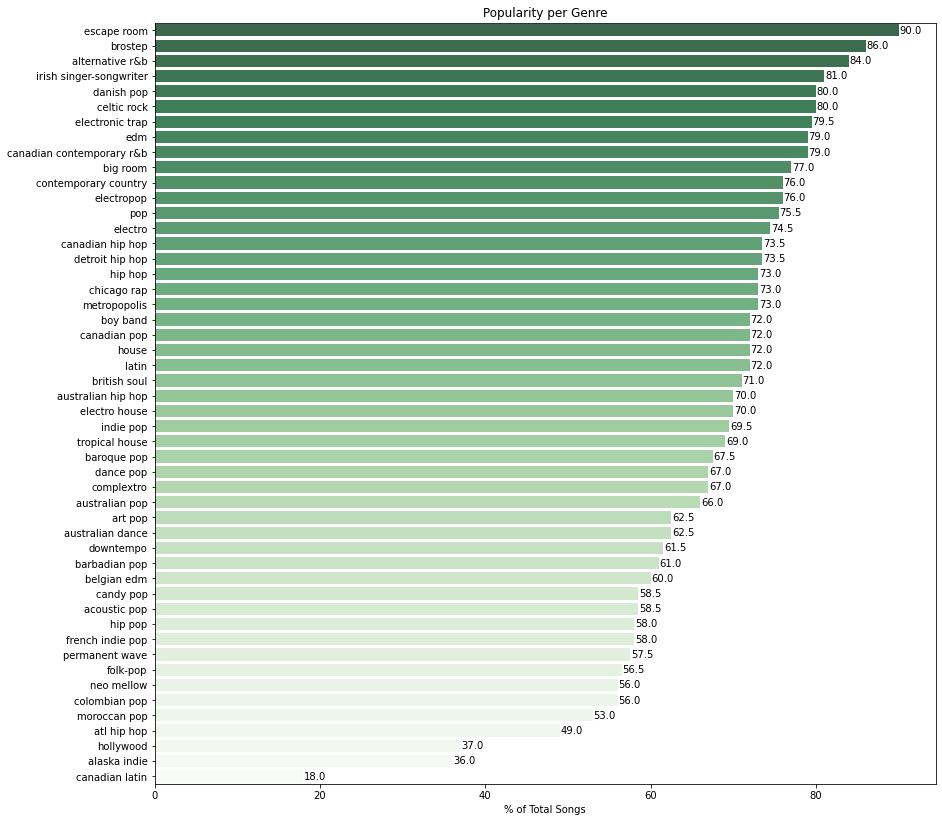

In [16]:
# distribution of popularity per genre

genre_popularity = songs.groupby('genre').agg(avg_popularity=('popularity','median'),
                                              no_of_songs=('title', 'nunique'))
genre_order = genre_popularity.sort_values(by='avg_popularity', ascending=False).index
                   

plt.figure(figsize=(14, 14))

ax = sns.barplot(x='avg_popularity',
                 y=genre_popularity.index,
                 data=genre_popularity,
                 order=genre_order,
                 palette='Greens_r', alpha=0.8 )

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 0.1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width),  # set variable to display, 2 decimals
            ha = 'left',    # horizontal alignment
            va = 'center')  # vertical alignment

plt.xlabel('% of Total Songs')
plt.ylabel('')
plt.title('Popularity per Genre')

plt.show()

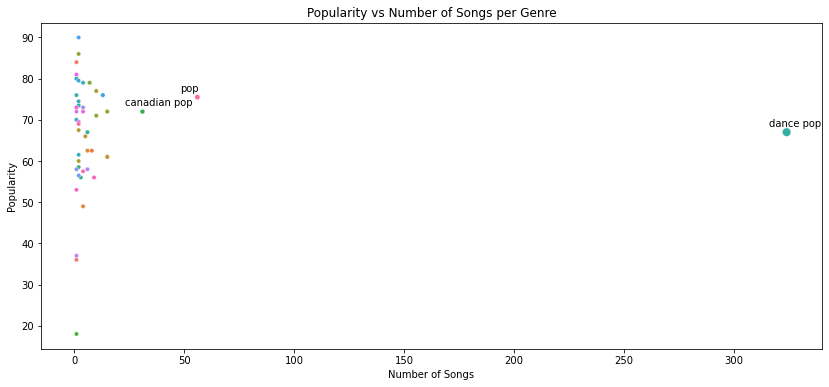

In [17]:
# scatter plot

plt.figure(figsize=(14, 6))
sns.scatterplot(x='no_of_songs',
                y='avg_popularity',
                hue=genre_popularity.index,
                data=genre_popularity,
                size='no_of_songs',
                legend=False,
               )


plt.xlabel('Number of Songs')
plt.ylabel('Popularity')
plt.title('Popularity vs Number of Songs per Genre')

for genre in genre_popularity.nlargest(3, 'no_of_songs').index:
    plt.annotate(genre, (genre_popularity.loc[genre][1]-8, genre_popularity.loc[genre][0] + 1.5))
    
plt.show()

# Popularity

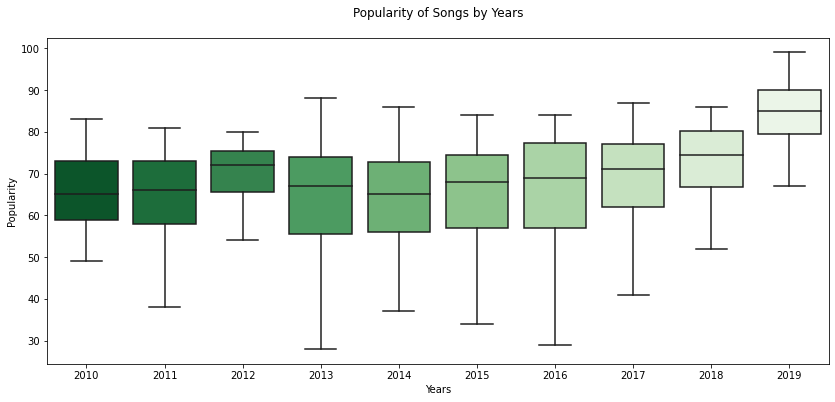

In [18]:
# popularity of songs over the years

plt.figure(figsize=(14,6))
sns.boxplot(data=songs, x='year', y='popularity', palette='Greens_r', showfliers=False)

plt.xlabel('Years')
plt.ylabel('Popularity')
plt.title('Popularity of Songs by Years\n')

plt.show()

***
- *On average, songs released in Year 2019 have higher popularity.*
***

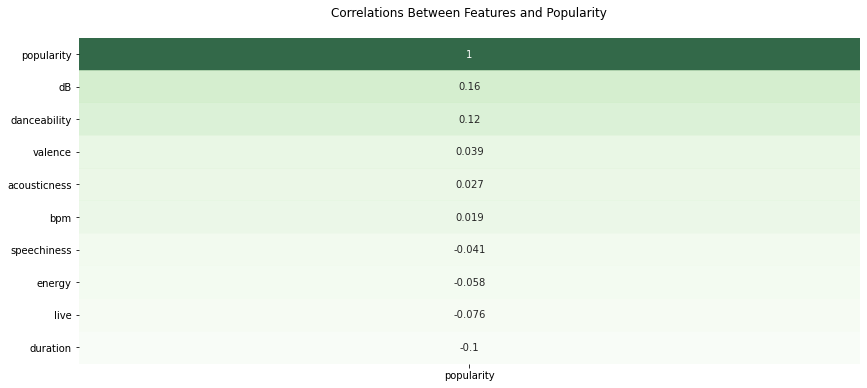

In [19]:
# correlations between popularity and features

corr_matrix = songs[['bpm', 'energy', 'danceability',
                     'dB', 'live', 'valence', 'duration',
                     'acousticness', 'speechiness', 'popularity']].corr()[['popularity']]

plt.figure(figsize = (14, 6))

sns.heatmap(corr_matrix.sort_values(by='popularity',ascending=False), annot = True, cmap='Greens', alpha=0.8, cbar=False)

plt.title("Correlations Between Features and Popularity\n")

plt.show()

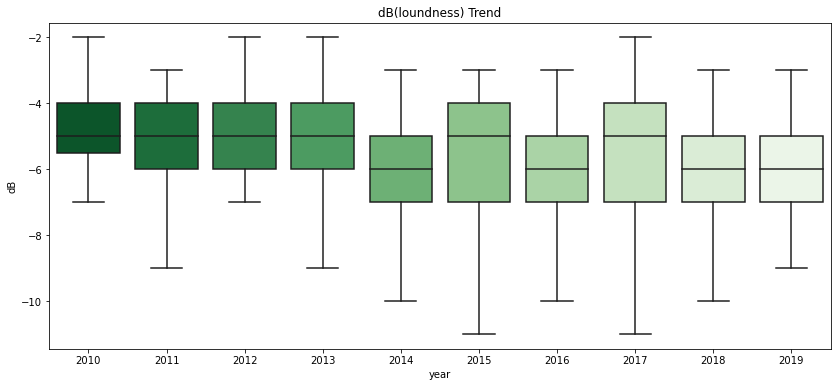

In [20]:
# dB trend

plt.figure(figsize=(14,6))

sns.boxplot( x = 'year', y = 'dB', data = songs, showfliers=False, palette='Greens_r')
plt.title('dB(loundness) Trend')

plt.show()


***
- *On average, the dB shoule be between -5 and -6 dB.*
***

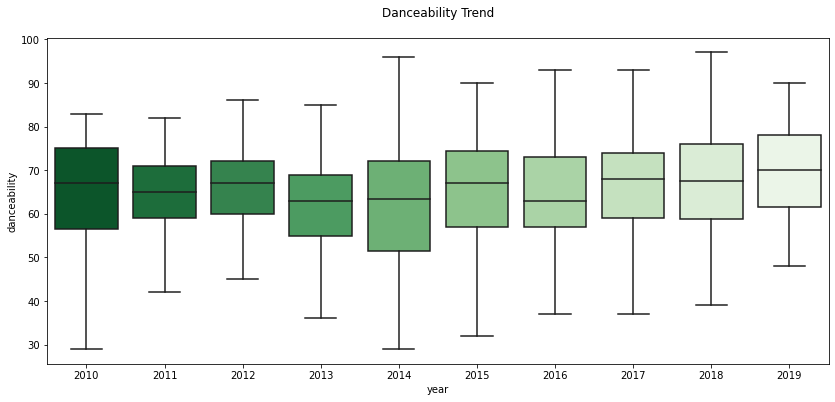

In [21]:
# danceability trend

plt.figure(figsize=(14,6))

sns.boxplot( x = 'year', y = 'danceability', data = songs, showfliers=False, palette='Greens_r')
plt.title('Danceability Trend\n')

plt.show()


***
- *Danceability increases over the years.*
***

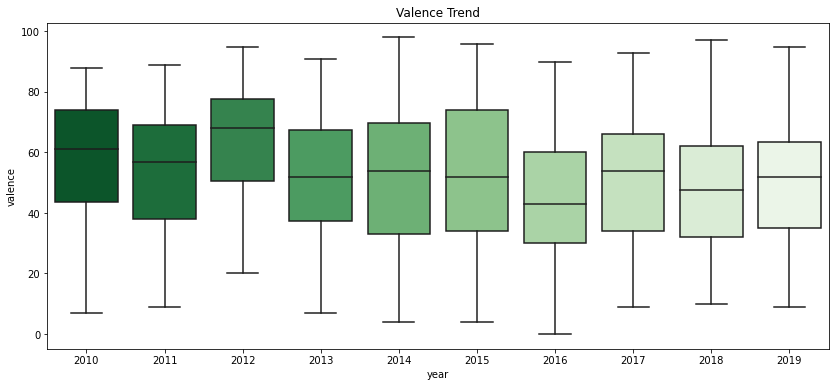

In [22]:
# valence trend

plt.figure(figsize=(14,6))

sns.boxplot( x = 'year', y = 'valence', data = songs, showfliers=False, palette='Greens_r')
plt.title('Valence Trend')

plt.show()

***
- *Valence has no obvious trend.*
***

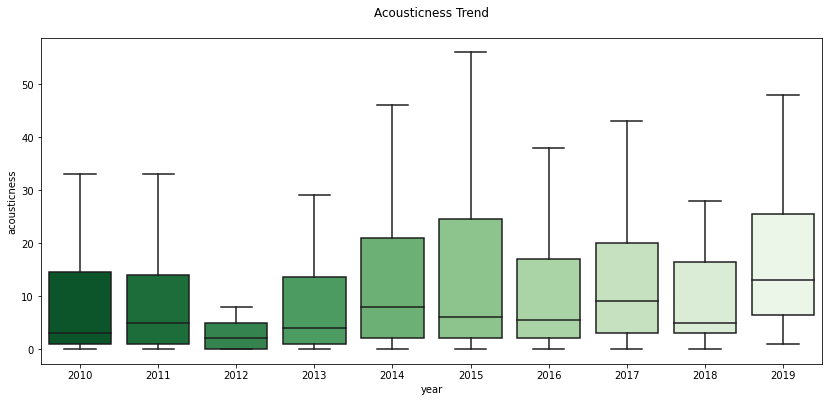

In [23]:
# acousticness trend

plt.figure(figsize=(14,6))

sns.boxplot( x = 'year', y = 'acousticness', data = songs, showfliers=False, palette='Greens_r')
plt.title('Acousticness Trend\n')

plt.show()

***
- *On average, acousticness increase over the years.*
***

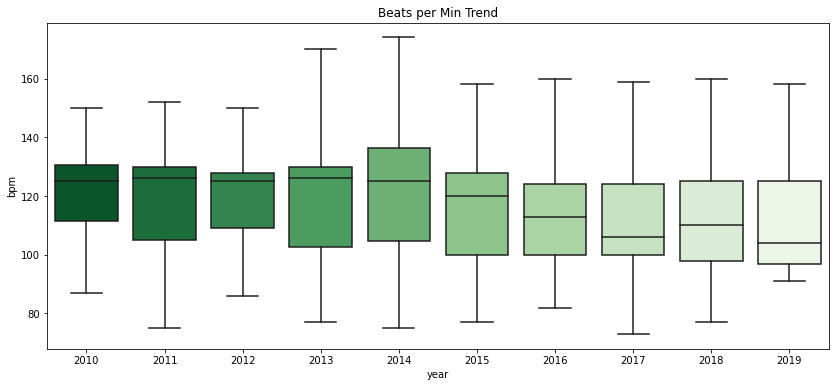

In [24]:
# bpm trend

plt.figure(figsize=(14,6))

sns.boxplot( x = 'year', y = 'bpm', data = songs, showfliers=False, palette='Greens_r')
plt.title('Beats per Min Trend')

plt.show()

***
- *On average, beats per min reduces over the years.*
***

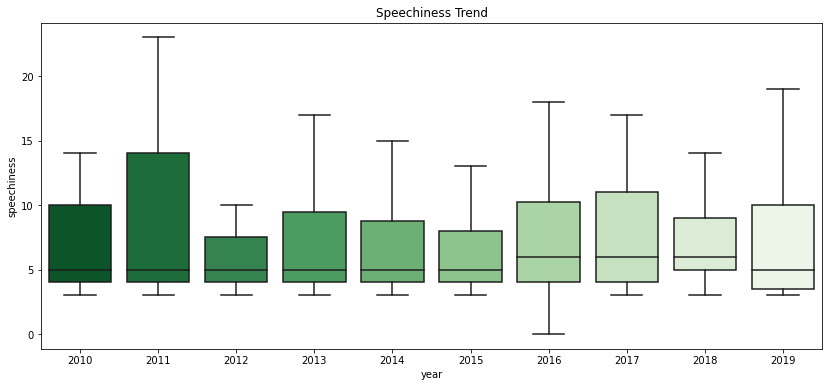

In [25]:
# speechiness trend

plt.figure(figsize=(14,6))

sns.boxplot( x = 'year', y = 'speechiness', data = songs, showfliers=False, palette='Greens_r')
plt.title('Speechiness Trend')

plt.show()

***
- *On average, speechiness has no change over the years.*
***

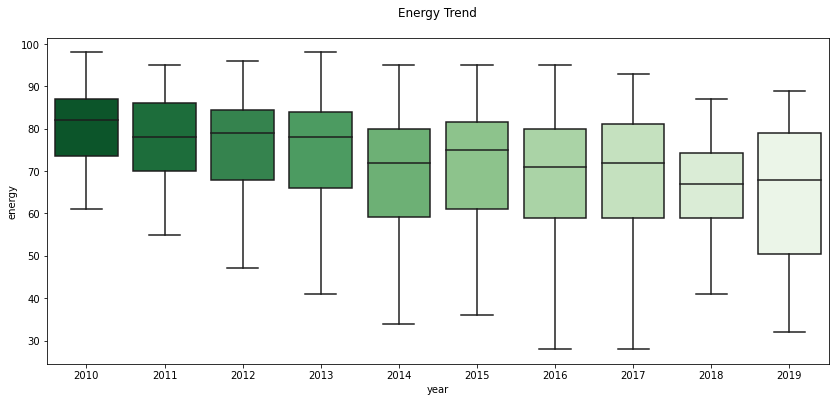

In [26]:
# energy trend

plt.figure(figsize=(14,6))

sns.boxplot( x = 'year', y = 'energy', data = songs, showfliers=False, palette='Greens_r')
plt.title('Energy Trend\n')

plt.show()

***
- *On average, energy reduces over the years.*
***

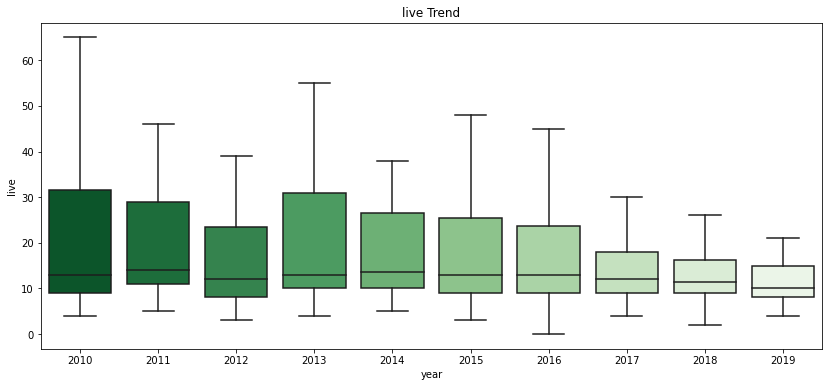

In [27]:
# live trend

plt.figure(figsize=(14,6))

sns.boxplot( x = 'year', y = 'live', data = songs, showfliers=False, palette='Greens_r')
plt.title('live Trend')

plt.show()

***
- *On average, live has little changes over the years.*
***

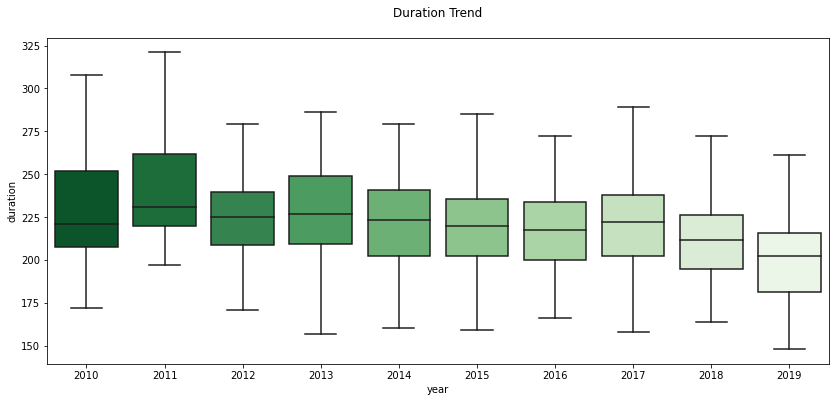

In [28]:
# duration trend

plt.figure(figsize=(14,6))

sns.boxplot( x = 'year', y = 'duration', data = songs, showfliers=False, palette='Greens_r')
plt.title('Duration Trend\n')

plt.show()

***
- *On average, duration reduces over the years.*
***

***
- *dB(loundness), danceability, valence, acousticness and bpm have positive correlation with popularity.*
- *Duration, live, energy, and speechniess have negative correclation with popularity.*
***

# Conclusion

## Data Preprocessing

- The dataset is loaded with correct type.
- The columns are renamed for reader-friendly.
- There are total 603 rows and 14 columns in the datasets.

## Data Analysis

- Top 20 popular artists are from USA, Canada and UK. 
- About 57% of songs from top 20 artists are dance pop, 16% are pop, and 11% are canadian pop.
- Dance pop genre has the greatest number of songs every year from 2010 to 2019.
- There are very few songs for the genres that have higher popularity of 80+ , such as escape room, brostep.etc. 
- Dance pop, pop, and Canadian pop have the many songs and have the poprlarity of 70+.
- dB(loundness), danceability, valence, acousticness and bpm have positive correlation with popularity. Duration, live, energy, and speechniess have negative correclation with popularity.
- On average, the songs released in Year 2019 have higher popularity than those released in 2010-2018, having higher dB(lounderness), danceability, acousticness, and lower energy, live and duration.

## Recommendation

- The songs for new artists should be Englsih songs.
- The songs shoud be pop genre, especially dance pop because it has the biggest market share.
- The songs should have higher danceaility, acousticness, lower energy and shorter duration.
